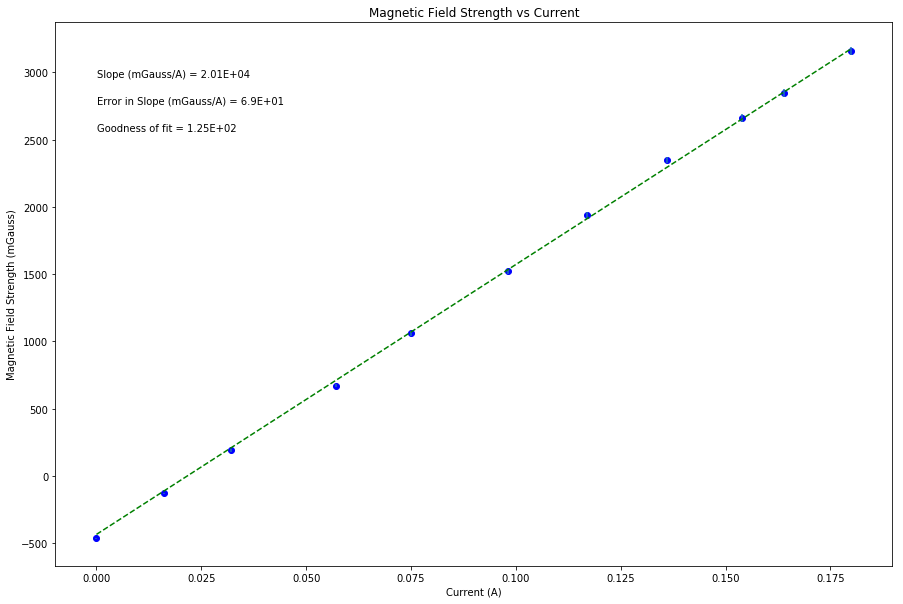

In [1]:
#Physics 218
#Biot-Savart Law and Helmholtz Coils Lab
#Sam Schonsberg

#Code Author: Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
currents = np.array([0,.016,.032,.057,.075,.098,.117,.136,.154,.164,.180]) #amps
magfields = np.array([-463,-130,190,670,1060,1520,1940,2350,2660,2850,3160]) #mGauss


#--------------------------------------------#
#Create arrays for uncertainties
err_magfields = np.array([3,5,10,10,20,20,20,20,30,30,30]) #mGauss
 

#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = currents   #this should be the array you want to plot on the x axis
y = magfields
dy = err_magfields  #this should be your error in y array

#----------------------------------------------#
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels
plt.xlabel('Current (A)')
plt.ylabel('Magnetic Field Strength (mGauss)')
plt.title('Magnetic Field Strength vs Current')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
 
plt.annotate('Slope (mGauss/A) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (mGauss/A) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
